In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = r'C:\Users\tygas\Downloads\Object Detection System\Object_Detection_Files\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model=  r'C:\Users\tygas\Downloads\Object Detection System\Object_Detection_Files\frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classLabels = []
file_name ='labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [7]:
print(len(classLabels))

91


In [5]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0000023314B995D0>

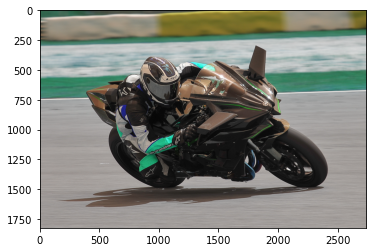

In [6]:
#read an image
img = cv2.imread('motorbike.png')
plt.imshow(img)

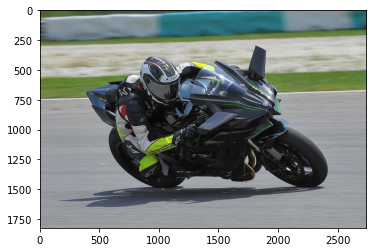

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [7]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [12]:
print(ClassIndex)

[4 1 1]


In [8]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale ,color=(0,255,0),thickness=3)

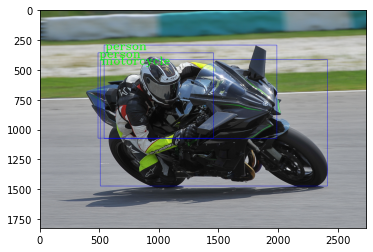

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
#for video
cap = cv2.VideoCapture('video.mp4')

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
        
    ClassIndex, confidence ,bbox = model.detect(frame,confThreshold=0.55)
        
    print(ClassIndex)                
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if (ClassInd<=91):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale ,color=(0,255,0),thickness=3)
    cv2.imshow('object detection model',frame)
        
    if cv2.waitKey(2)& 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()    

[3 3 3 3 1 3 3 1 3 1]
[3 3 3 3 3 1 3 1]
[3 3 1 3 3 3 1 1 3]
[ 3  3  3  1  3  3 10  1  1  3]
[ 3  3  3  1  3  1  1  3  1  3 10]
[ 3  3  3  3  1  1  3 10  3  1  1  1]
[ 3  3  3  3  3  3  1  1  1  1  1 10]
[ 3  3  3  3  3  3 10  1  1  1]
[ 3  3  3  3  3  3 10  1  1]
[ 3  3  3  3  3  3 10  1]
[ 3  3  3  3  1  3  1 10  1  3]
[ 3  3  3  3  3 10  3  1  3  1  1  1]
[ 3  3  3  3  3  3  1  3 10  1  1  1  3]
[3 3 3 3 3 3 3 1 1 1]
[3 3 3 3 1 3 3 1 1 1 3]
[3 3 3 3 3 1 1 1 1]
[3 3 3 3 3 1 1 1 1 3]
[3 3 3 3 3 1 1 1 3 1 1]
[3 3 3 3 3 1 1 1 1]
[3 3 3 3 3 1 1 1 1 1 1]
[3 3 3 3 3 1 1 1 1]
[ 3  3  3  3  3  1  1  1  1  1  1 10]
[ 3  3  3  3  3  1  1  3  1  1 10  1]
[ 3  3  3  3  3  1 10  3  1  1  1]
[3 3 3 3 3 1 3 1 1 1]
[ 3  3  3  1  3  3  3  1 10  1]
[ 3  3  1  3  3  1  1  3  3  1 10]
[3 3 3 1 3 1 3 1 3 1]
[ 3  3  3  1 10  3  1  1  3  1]
[ 3  3  3  1 10  1  3  3  1]
[ 3  3  1  3 10  1  1  3  1]
[ 3  3  1  3  1  1  3  1 10  1]
[ 3  3  1  3  1 10  1  1  1]
[3 3 1 3 1 1 1 1]
[3 3 1 3 1 1 1 3 1]
[3 3 1 3 1 1

[1 3 3 3 1 3 8 3 1 1 1 1]
[3 1 3 3 3 1 3 8 1 1 1 1]
[3 1 8 3 3 3 1 3 1 1 1 1 1]
[3 3 1 3 1 1 8 3 1 1 3 1]
[3 3 1 3 1 1 3 1 8 1 3 1 1]
[3 3 1 3 3 1 1 1 8 1 1 3]
[1 3 3 3 1 3 1 1 8 1]
[1 3 1 3 3 3 1 8 1 1]
[3 3 1 1 3 3 1 8 3]
[1 3 3 1 1 3 8 3 1 1 1 1]
[1 3 3 3 3 1 1 1 8 1]
[1 3 3 1 1 3 3 1 1 1 1]
[3 1 3 1 1 3 1 1 1 3 3]
[3 3 1 1 1 3 1 1 3 3 1]
[3 1 1 3 1 1 3 3 1 3 1]
[3 1 1 3 1 3 1 3 3 1 1]
[3 1 3 1 3 1 1 1 3 3 1 3]
[ 1  3  1  3  1  1  3  1  3  1  3  3  4 10  3]
[1 1 3 1 3 1 3 3 3 1 1 3]
[1 1 3 3 1 1 3 3 3 1 1 3 3]
[1 1 1 3 3 3 1 3 1 3 1]
[1 1 3 1 3 3 1 3 1 3 1]
[1 1 1 3 3 1 3 1 3 1 1]
[1 1 1 3 3 1 3 1 1 1 3 3]
[1 1 3 1 1 3 3 1 3 1 1 1]
[1 3 1 1 1 3 3 1 1]
[1 3 1 3 3 1 1 1 1 1 3]
[1 3 3 1 1 1 3 1 3 1]
[3 1 1 3 1 3 1 1 1 1 1]
[3 1 3 1 1 3 1 1 1 1 1]
[3 1 1 3 1 1 3 1 1 1 1]
[3 1 1 1 3 1 3 1 1 3 1]
[3 1 1 3 1 1 3 1 1 1 3]
[1 1 3 1 3 3 1 1 1 3 3 1 3]
[3 1 1 3 3 1 1 1 1 3 3 1]
[3 1 3 1 3 1 1 1 1 1 3 3]
[1 3 3 1 3 1 1 3 1 1 3]
[1 3 1 3 1 1 1 3 1 3 3 3]
[3 1 3 1 1 3 1 1 1 3 3 1 1 3]
[3 3 1 1 1 

In [ ]:
#for webcam
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open webcam")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
        
    ClassIndex, confidence ,bbox = model.detect(frame,confThreshold=0.55)
        
    print(ClassIndex)                
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if (ClassInd<=91):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale , color=(0,255,0),thickness=3)
    cv2.imshow('object detection model',frame)
        
    if cv2.waitKey(2)& 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()  

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[75  1]
[1]
[ 1 75]
[ 1 75]
[1]
[1]
[1]
[ 1 75]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62 62]
[ 1 62]
[1]
[1]
[ 1 62]
[ 1 62]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[ 1 62]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[87  1]
[ 1 77]
[ 1 87 47]
[47  1]
[87 87  1  1]
[87 87  1  1 77]
[87 87  1]
[ 1 87 87]
[ 1 87 87]
[87  1 87]
[87  1  1 87]
[ 1 87 87]
[87  1 87]
[87  1 87]
[ 1 87 87]
[ 1 87 87]
[1]
[ 1 87]
[ 1 87]
[ 1 87 87]
[1]
[1]
[ 1 87]
[1]
[ 1 87]
[ 1 87]
[ 1 87]
[ 1 87]
[ 1 87]
[ 1 87]
[ 1 87]
[1]
[ 1 87]
[87  1]
[87  1]
[87  1 87]
[87  1 87]
[87  1 87]
[1]
[1]
[1]
[87  1 87 87

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
